In [2]:
import pandas as pd
df = pd.read_pickle("./tes.pkl")  

In [3]:
prev_cols=['id',
 'advertType',
 'title',
 'Price_pm',
 'Price',
 'Area',
 'Rooms_num',
 'condition',#['TO_RENOVATION', 'READY_TO_USE', 'TO_COMPLETION', nan] 
 'Build_year', 
 'Floor_no',
 'Building_floors_num',
 'streetname', 
 'district',
 'residential',]

# ZWYKLE
c1=df['MY_Building_type']=='block' #20%bez kategorii
c2=df['Price_pm']>5
c3=df['Price_pm']<25
c4=df['MarketType']=='secondary'
c5=(df['Price']>250000)&(df['Price']<800000)
c6=(df['Area']>20)&(df['Area']<75)
c7=(df['Rooms_num']>1)&(df['Rooms_num']<4)
c8=df['ownership'].apply(lambda x: x not in ['LIMITED_OWNERSHIP', 'SHARE', 'USUFRUCT'])
c9=df['Building_floors_num']<14

df['Build_year'].fillna(1980)
c10=df['Build_year']<2005

# c9=df['district']=='Targówek'
# c10=df['Rooms_num']=='Zacisze'

zwykle=df.loc[c1&c2&c3&c4&c5&c6&c7&c8&c9&c10]
# zwykleplus=df.loc[c1&c2&c3&c4&c8&c9&c10]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Wesoła'),
  Text(1, 0, 'Rembertów'),
  Text(2, 0, 'Białołęka'),
  Text(3, 0, 'Wawer'),
  Text(4, 0, 'Targówek'),
  Text(5, 0, 'Ursus'),
  Text(6, 0, 'Bemowo'),
  Text(7, 0, 'Praga-Południe'),
  Text(8, 0, 'Ursynów'),
  Text(9, 0, 'Praga-Północ'),
  Text(10, 0, 'Bielany'),
  Text(11, 0, 'Mokotów'),
  Text(12, 0, 'Włochy'),
  Text(13, 0, 'Ochota'),
  Text(14, 0, 'Żoliborz'),
  Text(15, 0, 'Wola'),
  Text(16, 0, 'Śródmieście')])

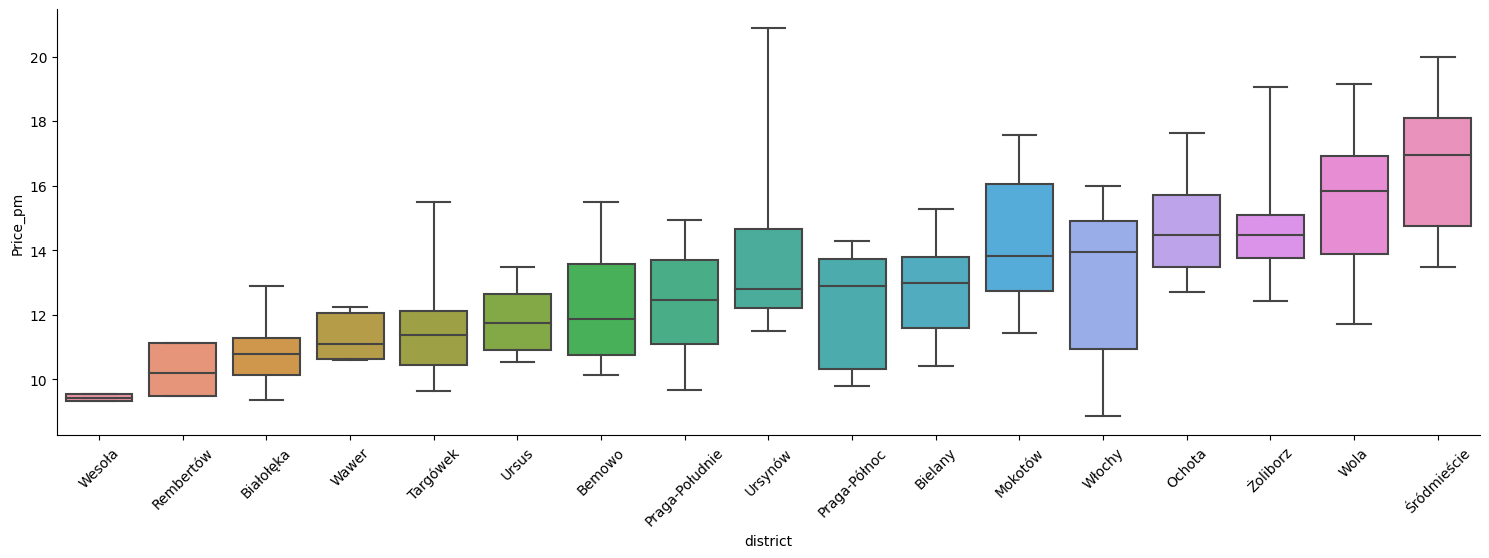

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

ords=zwykle.groupby('district')['Price_pm'].median().sort_values().index
sns.catplot(x='district', y='Price_pm', data=zwykle, kind='box', sym='', whis=[5,95], aspect=3, order=ords)
plt.xticks(rotation=45)

In [58]:

df2=zwykle.groupby('residential')[['Price_pm','latitude', 'longitude']].median()
df2['Price_pm']=df2['Price_pm'].round(2)
df2.reset_index(inplace=True)

In [59]:
df2

,residential,Price_pm,latitude,longitude
0,Bemowo-Lotnisko,11.93,52.256118,20.923412
1,Białołęka Dworska,11.26,52.328990,21.007680
2,Brzeziny,11.24,52.320220,21.032530
3,Bródno,11.29,52.288975,21.035581
4,Bródno-Podgrodzie,11.26,52.298770,21.047140
...,...,...,...,...
80,Wyględów,14.41,52.191990,20.990980
81,Zacisze,12.59,52.288380,21.083114
82,Śródmieście Południowe,20.32,52.223275,21.019887
83,Śródmieście Północne,16.42,52.236140,21.008170
